In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from util.load import DataLoader
from util.backtest import Backtest
from util.plot import (
    create_pairwise_scatter_plot,
    create_correlation_matrix,
    plot_backtest_results,
)

In [3]:
dataloader = DataLoader(data_dir="../data")
ticker = "kxhighny"
max_days = 100
df = dataloader.load_consolidated_daily_data(
    ticker, max_days=max_days, type_="polysignal"
)
df.drop(columns=["time", "ticker", "trade_id"]).head()

Loading kxhighny for 2025-03-25: 100%|██████████| 33/33 [00:00<00:00, 189.34it/s]


time_to_strike  day_forecast_strike_dev  current_forecast_strike_dev  \
0       86378.686                      1.9                        -11.9   
1       86378.686                      1.9                        -11.9   
2       86378.686                      1.9                        -11.9   
3       86378.686                      1.9                        -11.9   
4       86378.686                      1.9                        -11.9   

   day_current_forecast_dev  kalshi_strike_dev  polymk_strike_dev  \
0                      13.8                0.0             -4.239   
1                      13.8                0.0             -4.239   
2                      13.8                0.0             -4.239   
3                      13.8                0.0             -4.239   
4                      13.8                0.0             -4.239   

   kalshi_polymk_dev  kalshi_day_forecast_dev  polymk_day_forecast_dev  \
0              4.239                      1.9                    6.139   
1              4.239                      1.9                    6.139   
2              4.239                      1.9                    6.139   
3              4.239                      1.9                    6.139   
4              4.239                      1.9                    6.139   

   day_forecast_percipitation  ...  yes_price_sentiment_60  \
0                         5.0  ...                  43.333   
1                         5.0  ...                  43.333   
2                         5.0  ...                  43.333   
3                         5.0  ...                  43.333   
4                         5.0  ...                  43.333   

   count_sentiment_60  yes_price_trend_60  count_agg_120  yes_price_vol_120  \
0             100.733                  -4           1511              2.637   
1             100.733                  -4           1511              2.637   
2             100.733                  -4           1511              2.637   
3             100.733                  -4           1511              2.637   
4             100.733                  -4           1511              2.637   

   count_vol_120  taker_side_sentiment_120  yes_price_sentiment_120  \
0         99.877                       1.0                   43.333   
1         99.877                       1.0                   43.333   
2         99.877                       1.0                   43.333   
3         99.877                       1.0                   43.333   
4         99.877                       1.0                   43.333   

   count_sentiment_120  yes_price_trend_120  
0              100.733                   -4  
1              100.733                   -4  
2              100.733                   -4  
3              100.733                   -4  
4              100.733                   -4  

[5 rows x 55 columns]

In [4]:
df.describe()

time_to_strike  day_forecast_strike_dev  current_forecast_strike_dev  \
count    37214.000000             37214.000000                 37214.000000   
mean     47956.357374                 0.252203                    -7.582880   
std      17488.043095                 2.576735                     7.154513   
min          7.319000               -11.200000                   -34.000000   
25%      36406.347000                -1.300000                   -12.200000   
50%      45010.407000                 0.300000                    -5.600000   
75%      55056.524000                 1.800000                    -1.900000   
max      86399.922000                10.300000                     6.100000   

       day_current_forecast_dev  kalshi_strike_dev  polymk_strike_dev  \
count              37214.000000       37214.000000       37214.000000   
mean                   7.835084          -0.094113          -2.651921   
std                    7.268265           1.967175           3.317492   
min                   -1.800000          -7.378000         -11.934000   
25%                    2.000000          -1.462000          -4.964000   
50%                    5.500000          -0.032500          -2.511000   
75%                   12.900000           1.284000          -0.145000   
max                   32.200000           6.951000           6.449000   

       kalshi_polymk_dev  kalshi_day_forecast_dev  polymk_day_forecast_dev  \
count       37214.000000             37214.000000             37214.000000   
mean            2.557795                 0.346316                 2.904124   
std             2.582145                 1.783636                 3.088469   
min            -2.898000               -11.200000                -2.221000   
25%             0.533000                -0.669000                 0.350000   
50%             2.922000                 0.590000                 2.765000   
75%             4.484750                 1.484000                 5.316000   
max            10.673000                 7.700000                10.216000   

       day_forecast_percipitation  ...  yes_price_sentiment_60  \
count                37214.000000  ...            37214.000000   
mean                    27.987075  ...               35.800483   
std                     34.293189  ...               21.856497   
min                      0.000000  ...                3.000000   
25%                      1.000000  ...               18.093000   
50%                     17.000000  ...               32.878000   
75%                     37.000000  ...               50.381750   
max                    100.000000  ...               97.000000   

       count_sentiment_60  yes_price_trend_60  count_agg_120  \
count        37214.000000        37214.000000   37214.000000   
mean            33.215233           -1.855538    7145.761300   
std             30.571361           16.294733    6195.841788   
min              1.000000          -93.000000       1.000000   
25%             15.000000           -8.000000    3136.000000   
50%             25.236000           -1.000000    5346.000000   
75%             42.765000            4.000000    9221.750000   
max            786.500000           85.000000   37019.000000   

       yes_price_vol_120  count_vol_120  taker_side_sentiment_120  \
count       37214.000000   37214.000000              37214.000000   
mean            6.653488      55.440033                  0.563712   
std             5.705935      48.235916                  0.212661   
min             0.000000       0.000000                  0.000000   
25%             2.467000      24.519500                  0.438000   
50%             4.978000      43.228000                  0.572000   
75%             8.946000      69.909500                  0.703000   
max            30.263000     716.283000                  1.000000   

       yes_price_sentiment_120  count_sentiment_120  yes_price_trend_120  
count             37214.000000         37214.000000         37214

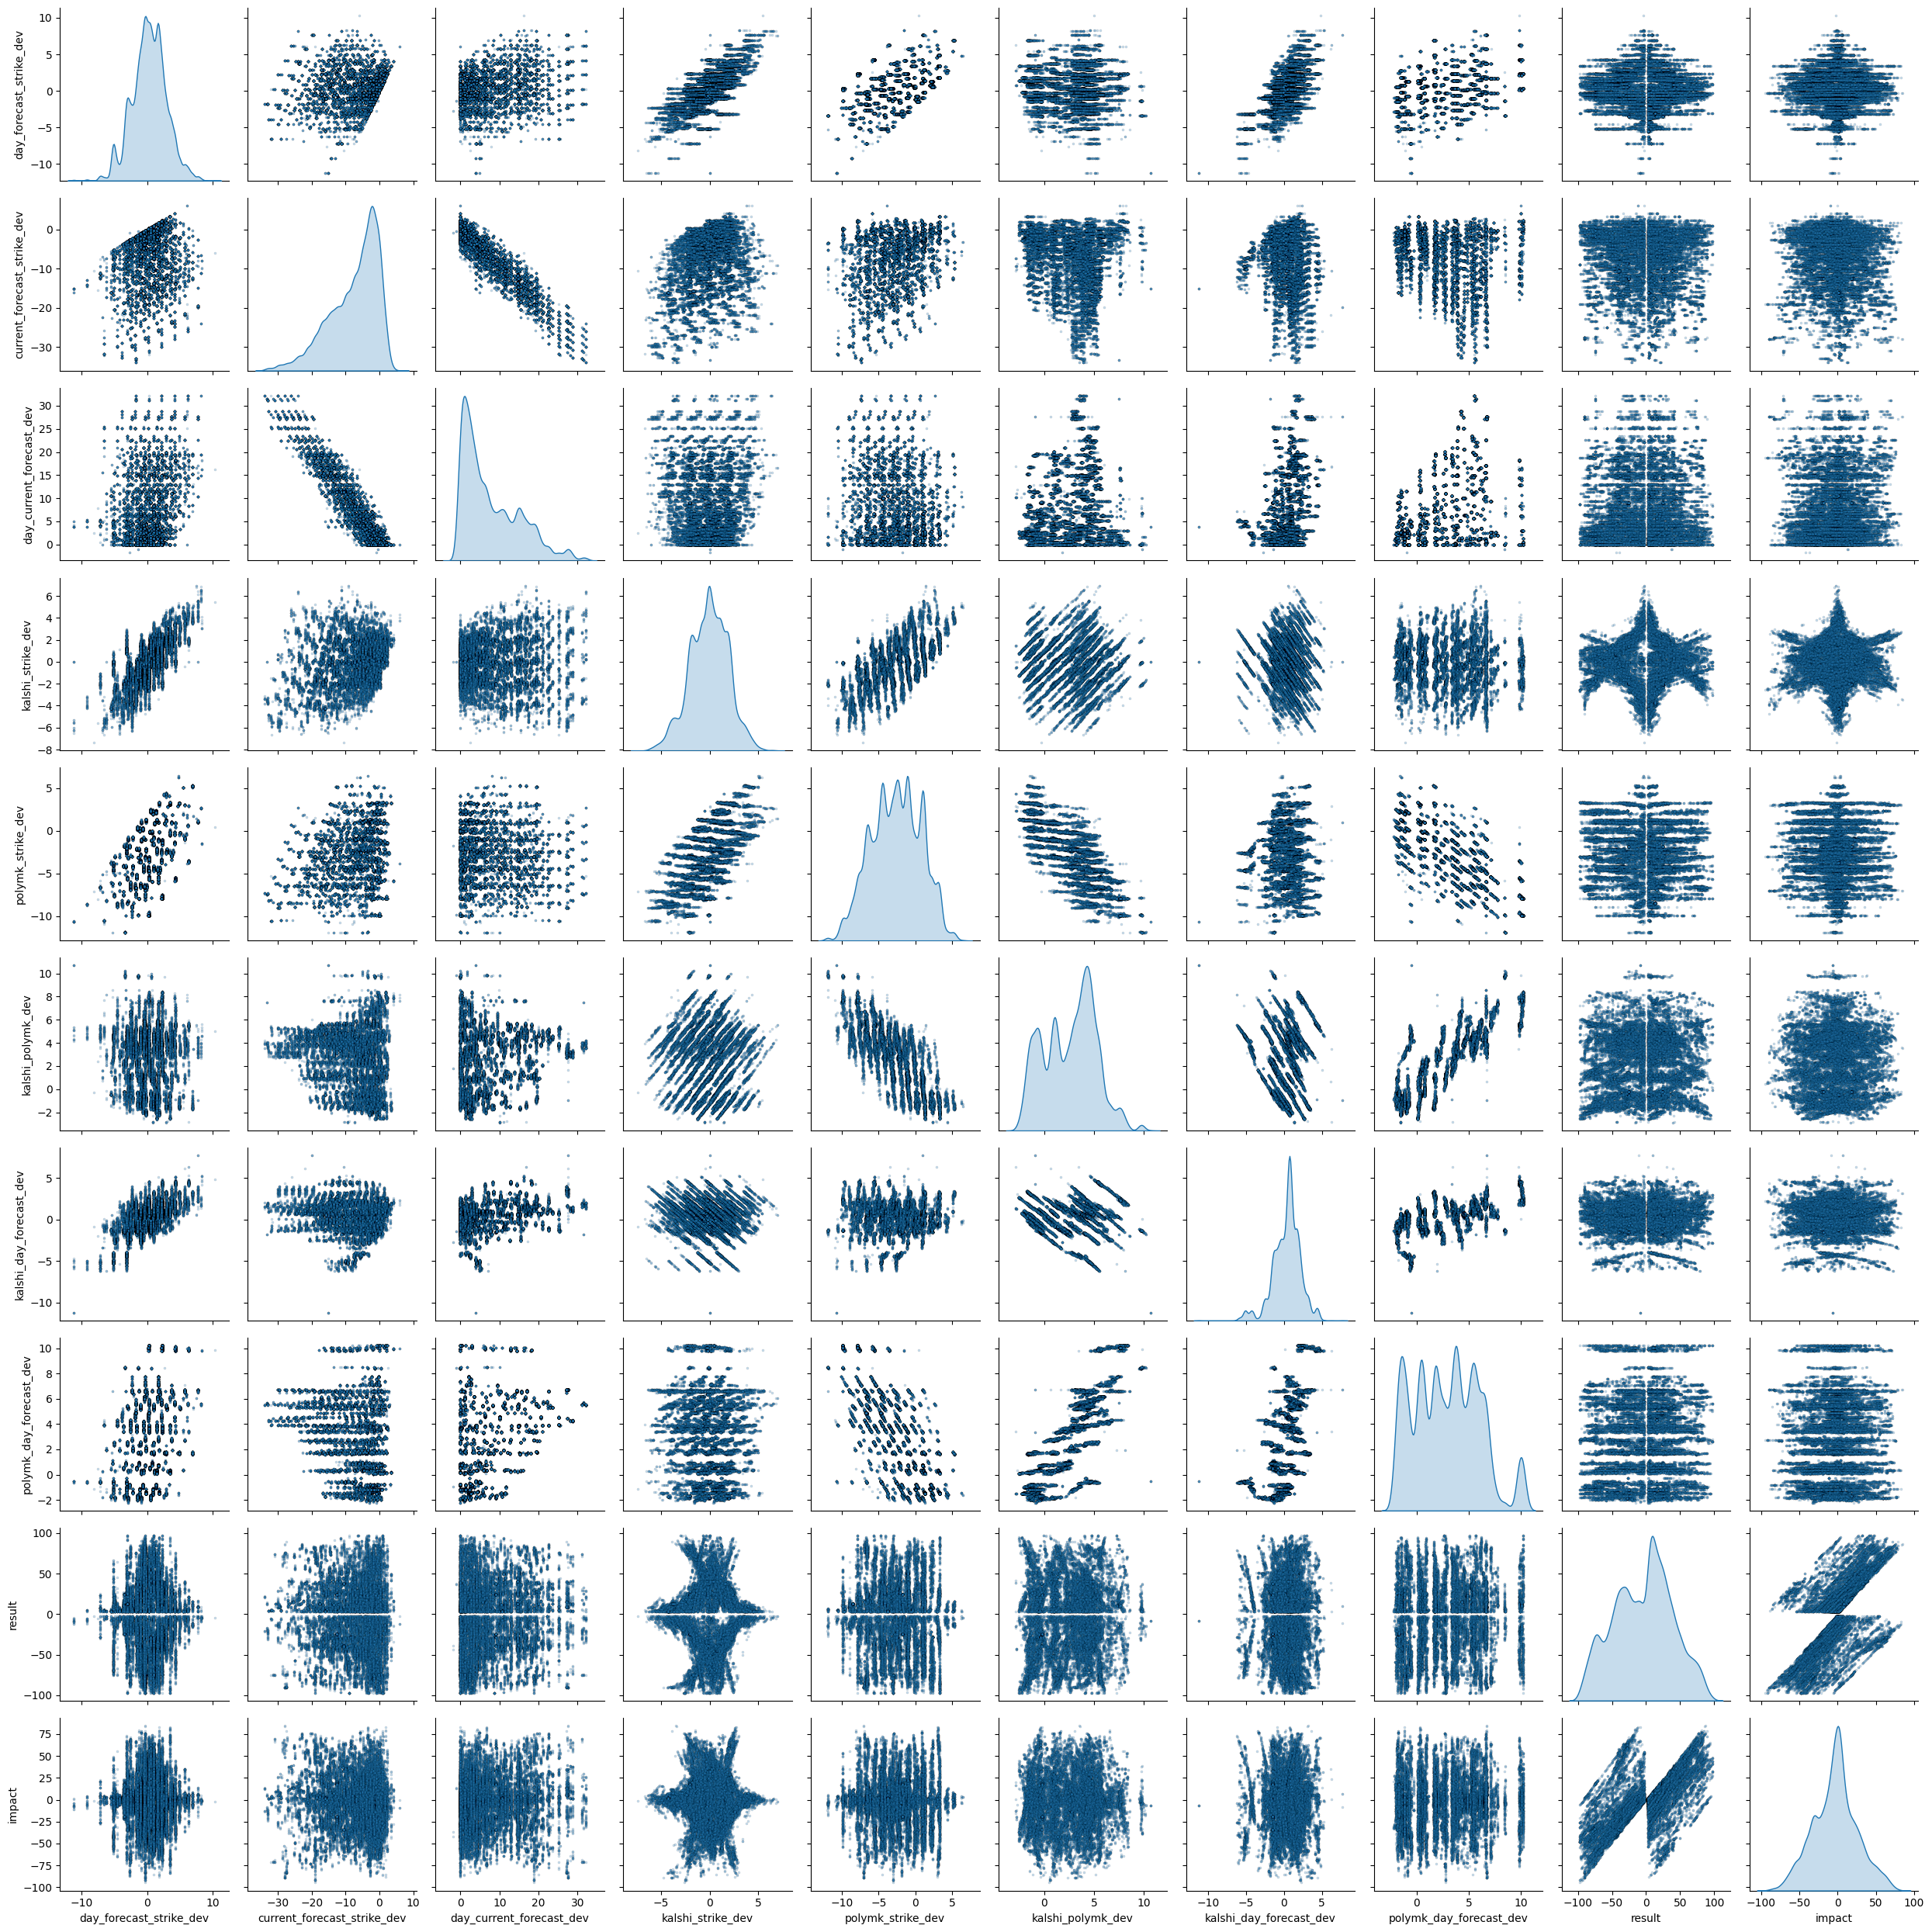

In [5]:
dev_features = [f for f in df.columns if f.endswith("dev")]
create_pairwise_scatter_plot(df, dev_features + ["result", "impact"])

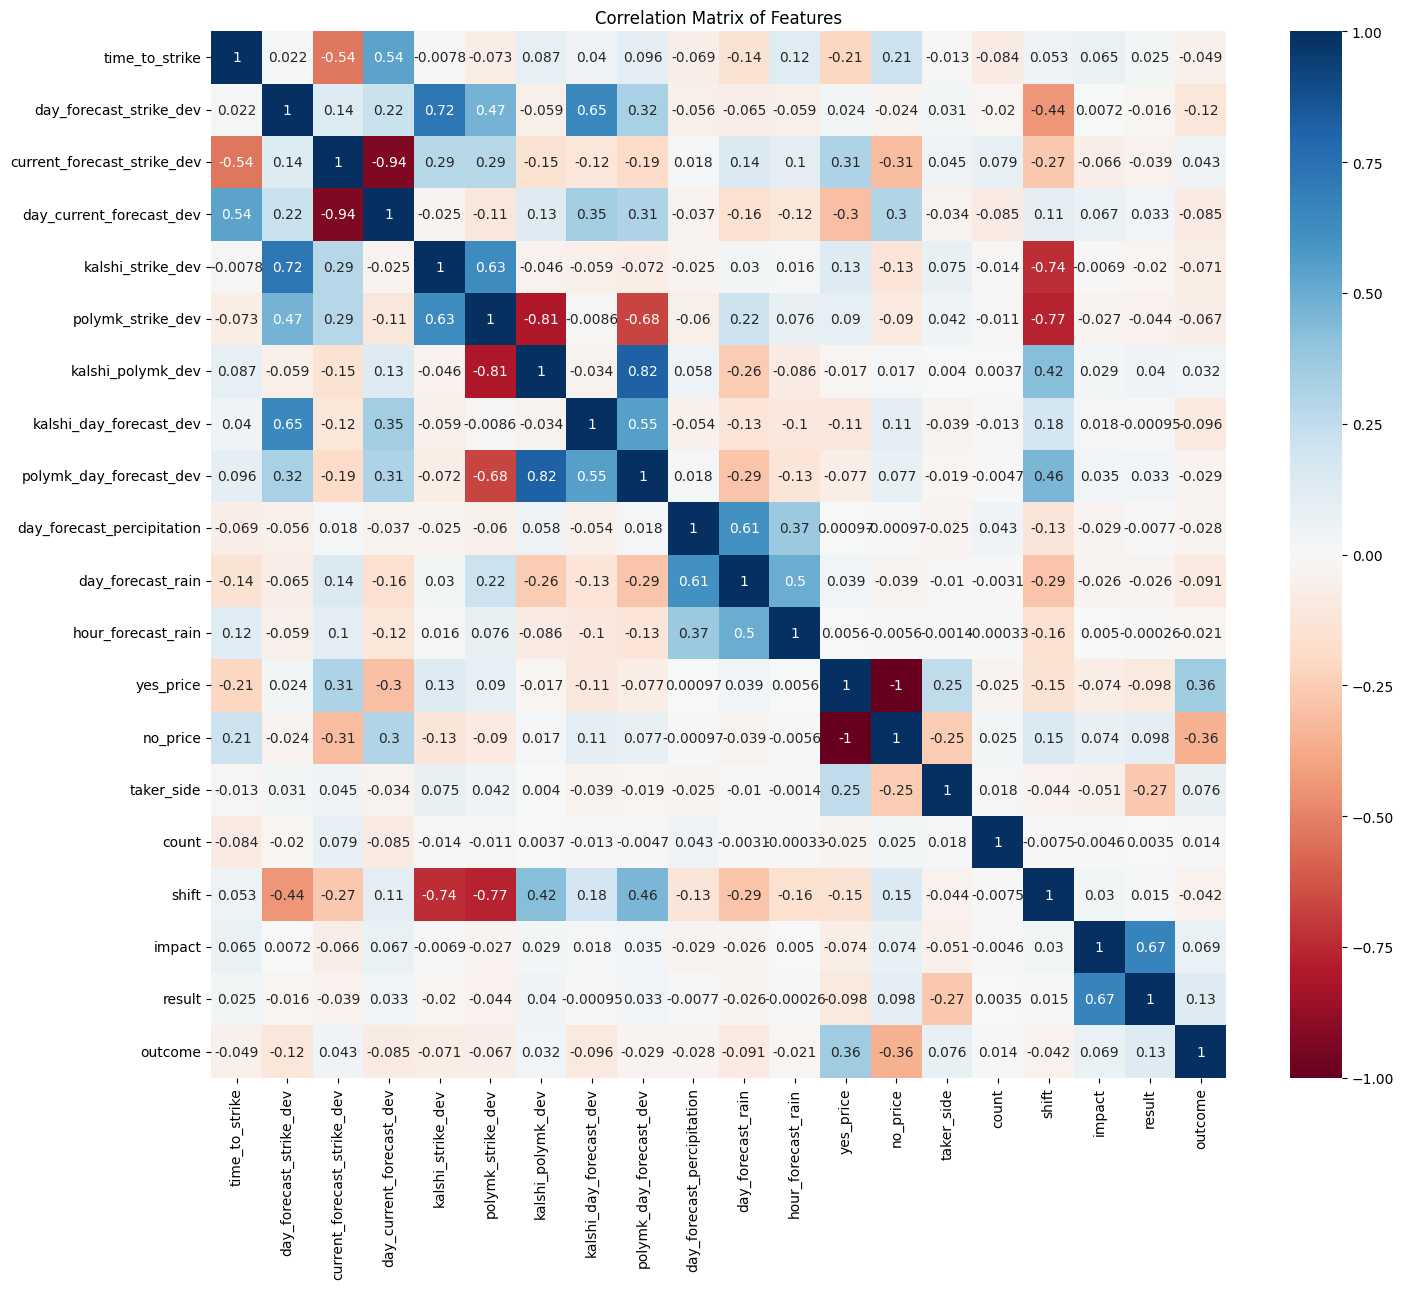

In [6]:
market_features = [
    f
    for f in df.columns.tolist()
    if not f.split("_")[-1].isdigit() and f not in ["time", "ticker", "trade_id"]
]
create_correlation_matrix(df, market_features)

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    QuantileRegressor,
    BayesianRidge,
)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


class Model(object):
    def __init__(
        self,
        output_metric: str = "result",
        features: list[str] = None,
        outlier_threshold: float = 0.00,
    ):
        self.output_metric = output_metric
        self.features = features
        self.outlier_threshold = outlier_threshold
        self.pipeline = Pipeline(
            [
                ("robust_scaler", RobustScaler(unit_variance=True)),
                (
                    "quantile_transformer",
                    QuantileTransformer(n_quantiles=100, output_distribution="normal"),
                ),
                (
                    "voting",
                    VotingRegressor(
                        estimators=[
                            (
                                "gb",
                                GradientBoostingRegressor(
                                    n_estimators=50,
                                    learning_rate=0.01,
                                    max_depth=3,
                                    subsample=0.5,
                                    min_samples_split=50,
                                    random_state=42,
                                ),
                            ),
                            (
                                "rf",
                                RandomForestRegressor(
                                    n_estimators=50, max_depth=3, random_state=42
                                ),
                            ),
                            ("lasso", LinearRegression()),
                            ("knn_10", KNeighborsRegressor(n_neighbors=20)),
                        ],
                        n_jobs=-1,
                    ),
                ),
            ]
        )

    def __call__(
        self, train_data: pd.DataFrame, input_data: pd.DataFrame
    ) -> pd.DataFrame:
        if self.features is None:
            self.features = [
                f
                for f in train_data.columns.tolist()
                if (
                    f
                    not in ["time", "result", "impact", "ticker", "trade_id", "outcome"]
                )
                and (not f[-1].isdigit())
            ]
            # print(self.features)
        self.pipeline.fit(train_data[self.features], train_data[self.output_metric])
        input_predictions = self.pipeline.predict(input_data[self.features])
        train_predictions = self.pipeline.predict(train_data[self.features])
        return train_predictions, input_predictions

100%|██████████| 33/33 [00:30<00:00,  1.07it/s]


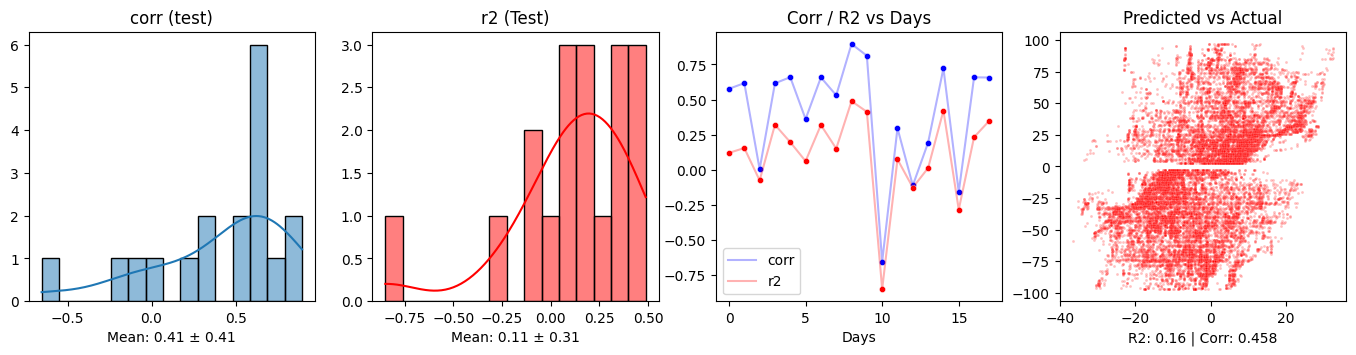

In [13]:
min_window_size, max_window_size, backtest_window = 15, 30, 50

output_metric = "result"
backtest = Backtest("kxhighny", data_dir="../data", backtest_window=backtest_window)
model = Model(features=None, output_metric=output_metric)

results, predictions, day_predictions, predictions_df = backtest.get_backtest_stats(
    model,
    min_window_size,
    max_window_size,
    output_metric=output_metric,
    # scaler=QuantileTransformer(n_quantiles=100, output_distribution="uniform")
    # scaler=QuantileTransformer(n_quantiles=100, output_distribution="normal")
)
plot_backtest_results(results, predictions)

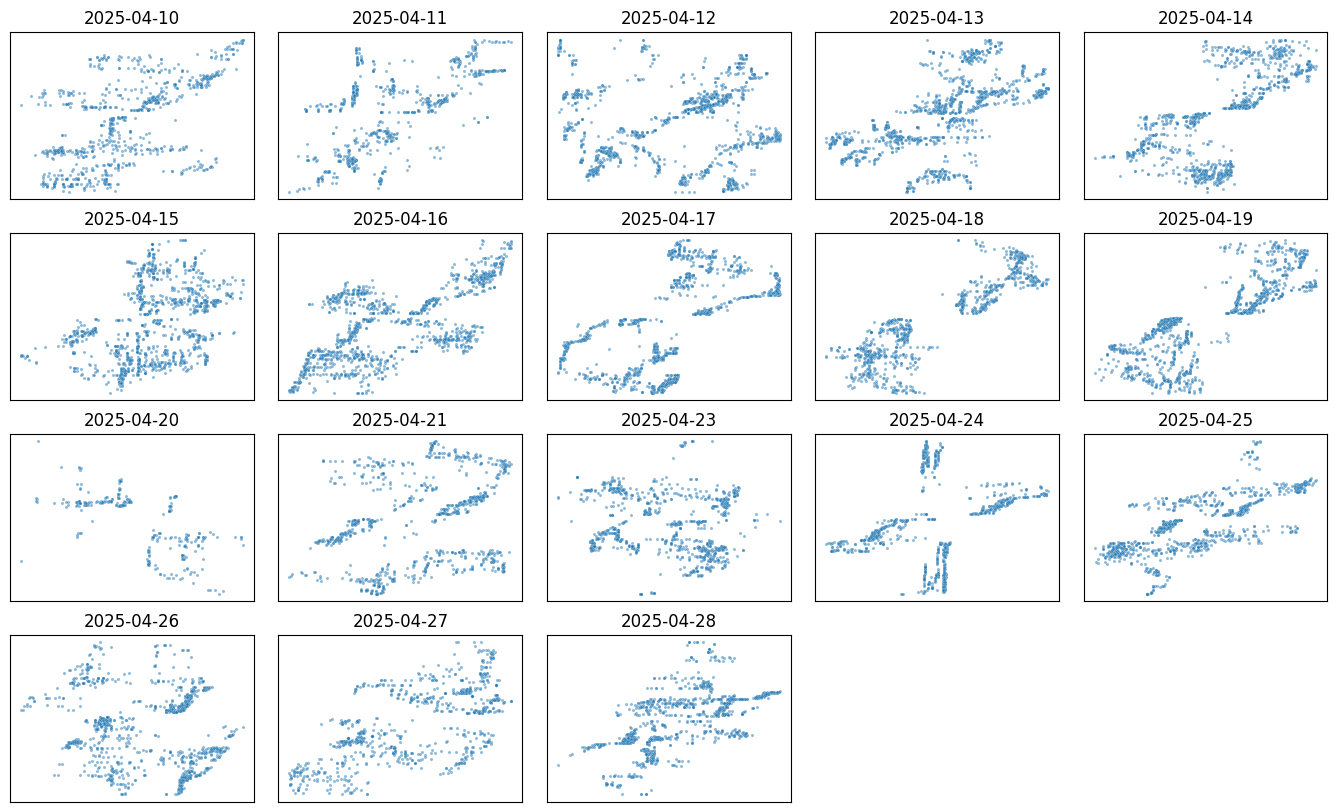

In [14]:
dates = sorted(list(day_predictions.keys()))
fig, axs = plt.subplots(len(dates) // 5 + 1, 5, figsize=(17, 10))

# Add padding between subplots
plt.subplots_adjust(hspace=0.2, wspace=0.1)

for i in range(0, len(dates), 5):
    for idx, date in enumerate(dates[i : i + 5]):
        if i // 5 < axs.shape[0] and idx < axs.shape[1]:  # Check if the subplot exists
            # axs[i//5, idx].scatter(day_predictions[date]["y_pred"], day_predictions[date]["y_real"], alpha=0.5, s=2)
            sns.scatterplot(
                x="y_pred",
                y="y_real",
                data=day_predictions[date],
                ax=axs[i // 5, idx],
                alpha=0.5,
                s=5,
            )
            axs[i // 5, idx].set_title(date)
            axs[i // 5, idx].xaxis.set_visible(False)
            axs[i // 5, idx].yaxis.set_visible(False)

# Hide empty subplots in the last row
for i in range(len(dates), (len(dates) // 5 + 1) * 5):
    row = i // 5
    col = i % 5
    if row < axs.shape[0] and col < axs.shape[1]:
        axs[row, col].set_visible(False)
plt.show()

In [9]:
np.mean(predictions_df[predictions_df["taker_side"] == 1]["result"])
np.mean(predictions_df[predictions_df["taker_side"] == 0]["result"])

np.float64(13.619694006672034)

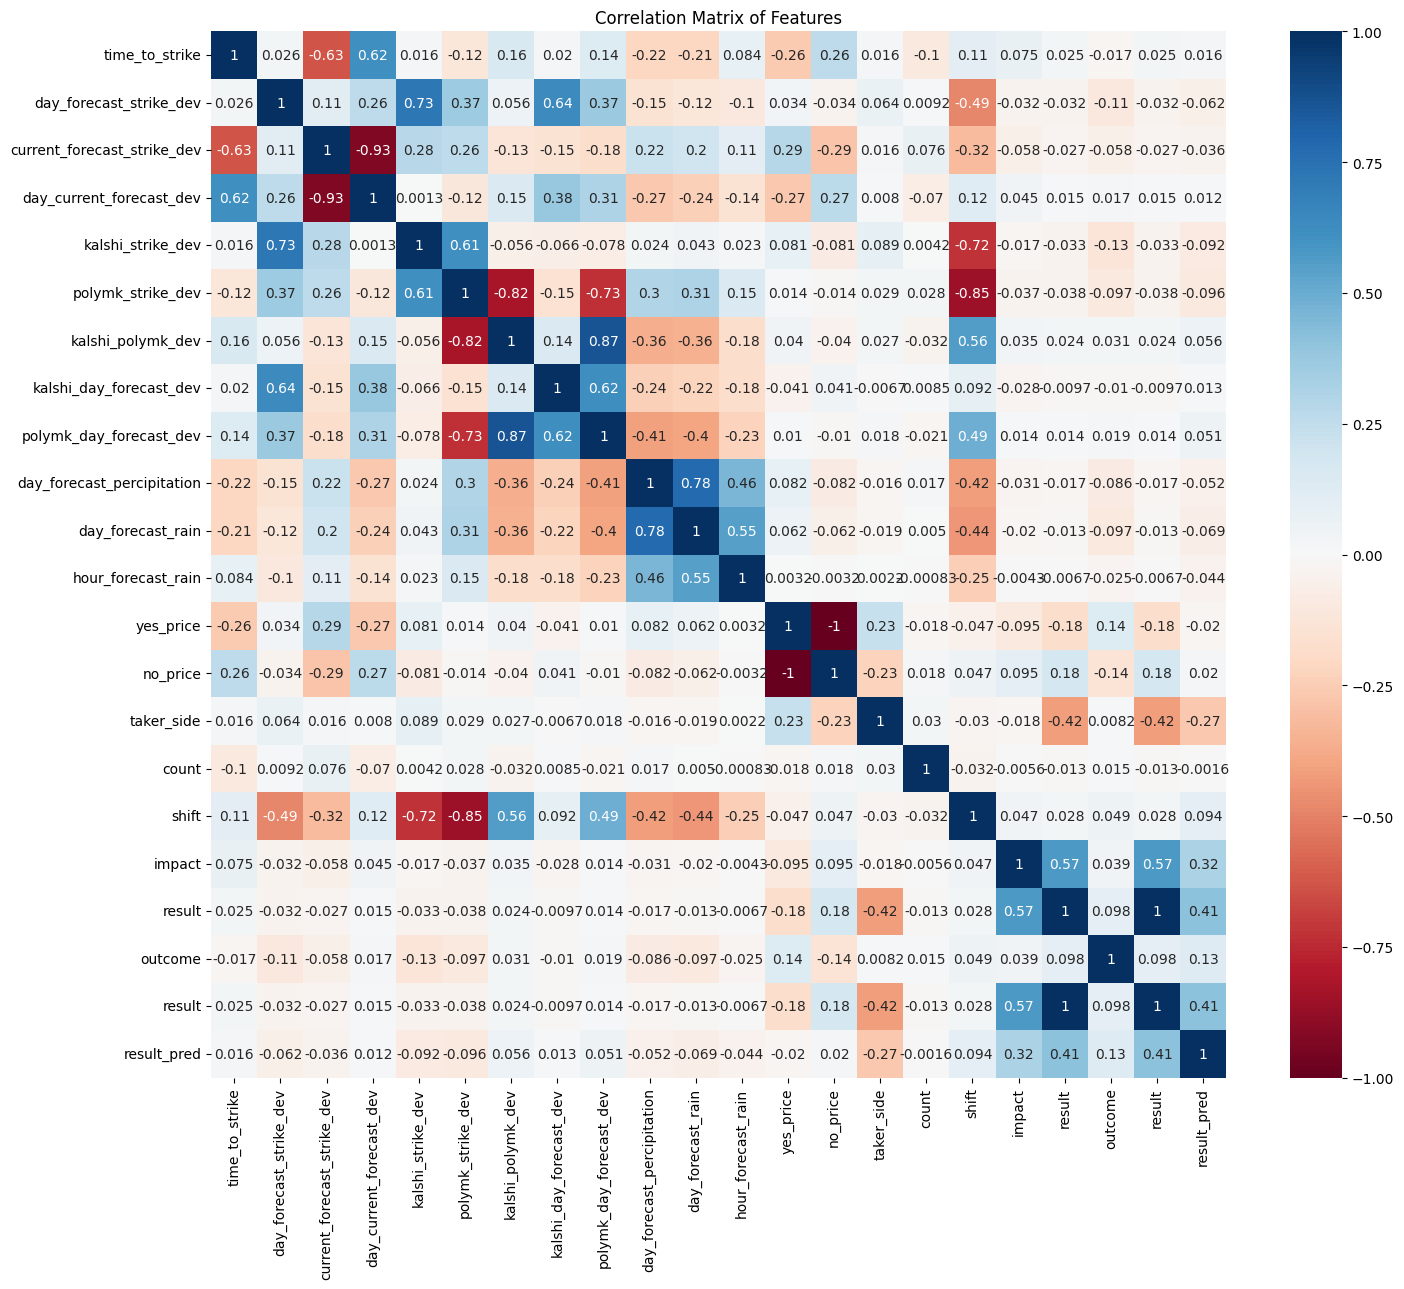

In [10]:
create_correlation_matrix(predictions_df, market_features + ["result", "result_pred"])